In [1]:
# Initial Imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
from MCForecastTools import MCSimulation
from fastquant import get_crypto_data
from fastquant import get_stock_data
import datetime as dt
import seaborn
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")
%matplotlib inline

In [2]:
# Crypto Info
BTC_1 = get_crypto_data("BTC/USDT", "2017-08-17", "2022-03-19")
ETH_1 = get_crypto_data("ETH/USDT", "2017-08-17", "2022-03-19")

# Get stock data
SPY_1 = get_stock_data("SPY", "2007-01-02", "2022-03-19")
GLD_1 = get_stock_data("GLD", "2007-01-02", "2022-03-19")
TLT_1 = get_stock_data("TLT", "2007-01-02", "2022-03-19")

BTC_1.columns = pd.MultiIndex.from_product([['BTC_1'], BTC_1.columns])
ETH_1.columns = pd.MultiIndex.from_product([['ETH_1'], ETH_1.columns])
SPY_1.columns = pd.MultiIndex.from_product([['SPY_1'], SPY_1.columns])
TLT_1.columns = pd.MultiIndex.from_product([['TLT_1'], TLT_1.columns])
GLD_1.columns = pd.MultiIndex.from_product([['GLD_1'], GLD_1.columns])

# Combine Stock Info
stock_data = pd.concat([SPY_1, GLD_1, BTC_1, TLT_1, ETH_1], axis=1)
stock_data = stock_data.dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = stock_data,
    weights = [.2, .2, .2, .2, .2],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [4]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.021006,0.969023,1.004846,0.969457,1.021934,0.984377,1.000501,1.004852,1.004662,0.999180,...,1.003796,0.999519,1.009410,1.010879,1.007726,1.014358,1.033778,1.000117,1.020906,1.025602
2,1.012097,0.962084,1.001782,0.969524,1.025081,0.996255,1.000253,0.995594,0.997401,1.004667,...,1.021790,1.012720,1.007132,0.998417,1.012630,1.026525,1.039683,1.001100,1.036171,1.007685
3,1.009888,0.966883,1.000277,0.948486,1.048039,1.006452,0.989909,1.025147,0.995579,1.036129,...,0.999872,1.047019,1.025582,0.999455,0.992484,1.021343,1.019254,1.029097,1.031827,1.009532
4,1.017510,1.004942,0.982438,0.929172,1.022508,1.004391,0.996825,1.006643,1.036901,1.045728,...,0.995894,1.045638,1.034811,0.964882,1.006896,1.012576,1.017756,0.993023,1.040658,1.006026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,6.533197,3.896944,9.888979,8.595202,4.877696,8.492115,7.107729,19.253608,13.000605,6.914928,...,4.845895,16.718506,3.783602,4.054479,9.060414,4.438185,29.523037,4.987422,7.614100,3.963595
1257,6.577319,3.897689,9.898830,8.590550,4.794012,8.671591,7.080373,19.360537,13.055066,6.907199,...,4.842444,16.825930,3.877601,4.010675,9.215976,4.444881,29.342259,5.158021,7.936060,4.048280
1258,6.466756,3.915755,10.033567,8.560922,4.843668,8.555790,7.222370,19.913136,13.080921,7.026689,...,4.822499,17.001584,3.826899,3.946242,9.268811,4.454412,30.200976,5.152927,8.064785,4.064985
1259,6.420961,3.883393,10.198649,8.538397,4.837184,8.603609,7.208336,19.799546,12.814706,7.060417,...,4.724479,17.338372,3.908627,3.938465,9.278559,4.485161,28.867093,5.237977,8.196422,4.082268


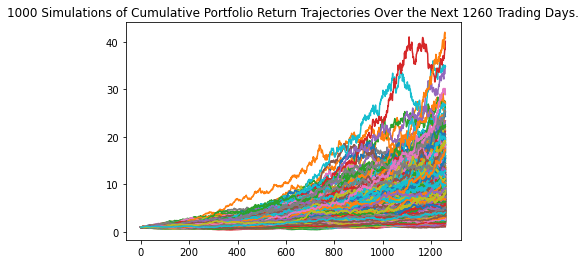

In [5]:
line_plot = MC_even_dist.plot_simulation()

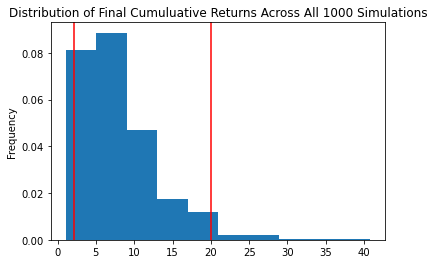

In [6]:
dist_plot = MC_even_dist.plot_distribution()

In [7]:
even_tbl = MC_even_dist.summarize_cumulative_return()
print(even_tbl)

count           1000.000000
mean               8.077331
std                5.108686
min                1.075953
25%                4.515193
50%                6.804229
75%               10.233784
max               40.786653
95% CI Lower       2.088588
95% CI Upper      19.994279
Name: 1260, dtype: float64


In [8]:
#set inital investment
initial_investment = 100000

# Use the lower and upper 95% confidence intervals to calculate the range of possible outcomes of our $100,000
ci_lower = round(even_tbl[8]*(initial_investment),2)
ci_upper = round(even_tbl[9]*(initial_investment),2)
ci_25 = round(even_tbl[4]*(initial_investment),2)
ci_50_50 = round(even_tbl[5]*(initial_investment)*.25,2)

# print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

print(f"There is a 75% chance that an initial investment of ${initial_investment} will be worth ${ci_25}")

print(f"Median with a 75% discount rate is ${ci_50_50} after five years")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within the range of $208858.83 and $1999427.89
There is a 75% chance that an initial investment of $100000 will be worth $451519.29
Median with a 75% discount rate is $170105.72 after five years


In [9]:
mean = round(even_tbl[1])
std = round(even_tbl[2])


sharpe_ratio = mean/std
sharpe_ratio

1.6